In [4]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

network = models.Sequential()
network.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255  # normalization
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


Epoch 1/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.6045 - accuracy: 0.8489
Epoch 2/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.3310 - accuracy: 0.9086
Epoch 3/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.3019 - accuracy: 0.9156
Epoch 4/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.2883 - accuracy: 0.9190
Epoch 5/5
10000/10000 [==============================] - 0s 26us/step
test_acc: 0.9229000210762024


ERROR! Session/line number was not unique in database. History logging moved to new session 161
    Num Layers                                Layer Configuration  \
0            0                        Input → Output (10 neurons)   
1            1  Input → Hidden Layer 1 (128 neurons) → Output ...   
2            2  Input → Hidden Layer 1 (128 neurons) → Hidden ...   
3            3  Input → Hidden Layer 1 (128 neurons) → Hidden ...   
4            4  Input → Hidden Layer 1 (128 neurons) → Hidden ...   
5            5  Input → Hidden Layer 1 (128 neurons) → Hidden ...   
6            6  Input → Hidden Layer 1 (128 neurons) → Hidden ...   
7            7  Input → Hidden Layer 1 (128 neurons) → Hidden ...   
8            8  Input → Hidden Layer 1 (128 neurons) → Hidden ...   
9            9  Input → Hidden Layer 1 (128 neurons) → Hidden ...   
10          10  Input → Hidden Layer 1 (128 neurons) → Hidden ...   
11          11  Input → Hidden Layer 1 (128 neurons) → Hidden ...   

    La

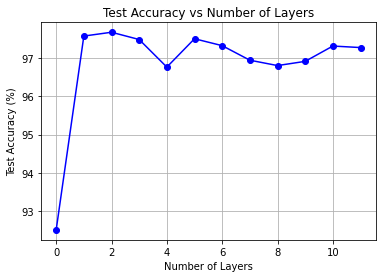

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255  # normalization
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

results = []

for num_layers in range(0, 12):  
    
    network = models.Sequential()

    layer_config = []
    
    if num_layers == 0:
        network.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))
        layer_config.append("Input → Output (10 neurons)")
    else:
        network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
        layer_config.append("Input → Hidden Layer 1 (128 neurons)")
        
        for i in range(num_layers - 1):  
            network.add(layers.Dense(64, activation='relu'))  
            layer_config.append(f"Hidden Layer {i + 2} (64 neurons)")
        
        network.add(layers.Dense(10, activation='softmax'))
        layer_config.append("Output (10 neurons)")

    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = network.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)
    
    last_train_loss = history.history['loss'][-1]
    last_train_acc = history.history['accuracy'][-1]
    
    test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=0)
    
    results.append({
        "Num Layers": num_layers,
        "Layer Configuration": " → ".join(layer_config),
        "Last Train Loss": last_train_loss,
        "Last Train Accuracy (%)": last_train_acc * 100,
        "Test Loss": test_loss,
        "Test Accuracy (%)": test_acc * 100
    })

results_df = pd.DataFrame(results)
print(results_df)

plt.plot(range(0, 12), [result["Test Accuracy (%)"] for result in results], marker='o', color='b')
plt.title('Test Accuracy vs Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Test Accuracy (%)')
plt.grid(True)
plt.show()

   Layer Size                                Layer Configuration  \
0           8  Input → Hidden Layer 1 (8 neurons) → Hidden La...   
1          16  Input → Hidden Layer 1 (16 neurons) → Hidden L...   
2          32  Input → Hidden Layer 1 (32 neurons) → Hidden L...   
3          64  Input → Hidden Layer 1 (64 neurons) → Hidden L...   
4         128  Input → Hidden Layer 1 (128 neurons) → Hidden ...   
5         256  Input → Hidden Layer 1 (256 neurons) → Hidden ...   
6         512  Input → Hidden Layer 1 (512 neurons) → Hidden ...   
7        1024  Input → Hidden Layer 1 (1024 neurons) → Hidden...   
8        2048  Input → Hidden Layer 1 (2048 neurons) → Hidden...   

   Last Train Loss  Last Train Accuracy (%)  Test Loss  Test Accuracy (%)  
0         0.397983                88.683331   0.393130          88.779998  
1         0.197759                94.300002   0.204691          94.120002  
2         0.122199                96.368331   0.146992          95.679998  
3         0.079

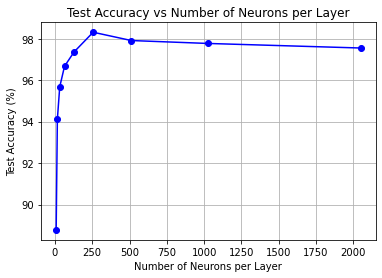

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255  # normalization
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

results = []

num_hidden_layers = 3  

for layer_size in [8 , 16 , 32, 64, 128, 256, 512, 1024, 2048]:  
    network = models.Sequential()
    
    network.add(layers.Dense(layer_size, activation='relu', input_shape=(28 * 28,)))
    layer_config = [f"Input → Hidden Layer 1 ({layer_size} neurons)"]
    
    for i in range(num_hidden_layers - 1):  
        network.add(layers.Dense(layer_size, activation='relu'))
        layer_config.append(f"Hidden Layer {i + 2} ({layer_size} neurons)")
    
    network.add(layers.Dense(10, activation='softmax'))
    layer_config.append("Output (10 neurons)")

    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = network.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)
    
    last_train_loss = history.history['loss'][-1]
    last_train_acc = history.history['accuracy'][-1]
    
    test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=0)
    
    results.append({
        "Layer Size": layer_size,
        "Layer Configuration": " → ".join(layer_config),
        "Last Train Loss": last_train_loss,
        "Last Train Accuracy (%)": last_train_acc * 100,
        "Test Loss": test_loss,
        "Test Accuracy (%)": test_acc * 100
    })

results_df = pd.DataFrame(results)
print(results_df)

plt.plot([result["Layer Size"] for result in results], [result["Test Accuracy (%)"] for result in results], marker='o', color='b')
plt.title('Test Accuracy vs Number of Neurons per Layer')
plt.xlabel('Number of Neurons per Layer')
plt.ylabel('Test Accuracy (%)')
plt.grid(True)
plt.show()

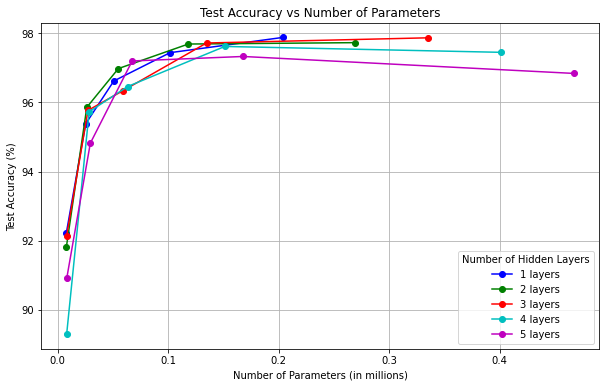

Results Table: Test Accuracy, Train Loss, Train Accuracy, and Parameters for Different Models

    Layer Configuration  Params (M)  Train Loss  Train Accuracy (%)  \
0    1 layers, 10 nodes    0.007960    0.273548           92.283332   
1    1 layers, 32 nodes    0.025450    0.163794           95.349997   
2    1 layers, 64 nodes    0.050890    0.106198           96.846664   
3   1 layers, 128 nodes    0.101770    0.072534           97.898334   
4   1 layers, 256 nodes    0.203530    0.049911           98.530000   
5    2 layers, 10 nodes    0.008070    0.288853           91.885000   
6    2 layers, 32 nodes    0.026506    0.133521           96.116668   
7    2 layers, 64 nodes    0.055050    0.087242           97.366667   
8   2 layers, 128 nodes    0.118282    0.052077           98.383331   
9   2 layers, 256 nodes    0.269322    0.034075           98.926669   
10   3 layers, 10 nodes    0.008180    0.276158           91.995001   
11   3 layers, 32 nodes    0.027562    0.123068      

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import pandas as pd

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255  # normalization
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

param_counts = []
test_accuracies = []
train_losses = []
train_accuracies = []
layer_configs = []

colors = ['b', 'g', 'r', 'c', 'm']

for num_layers in [1, 2, 3, 4, 5]:  
    for num_nodes in [10, 32, 64, 128, 256]:
        
        network = models.Sequential()

        network.add(layers.Dense(num_nodes, activation='relu', input_shape=(28 * 28,)))  # 第一層
        
        for _ in range(num_layers - 1):
            network.add(layers.Dense(num_nodes, activation='relu'))

        network.add(layers.Dense(10, activation='softmax'))

        network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
        
        history = network.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)
        
        param_count = sum(np.prod(layer.get_weights()[0].shape) + np.prod(layer.get_weights()[1].shape) for layer in network.layers if len(layer.get_weights()) > 0)
        param_counts.append(param_count / 1e6)  
        
        train_loss = history.history['loss'][-1]
        train_acc = history.history['accuracy'][-1]
        train_losses.append(train_loss)
        train_accuracies.append(train_acc * 100)
        
        test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=0)
        test_accuracies.append(test_acc * 100)  
        
        layer_configs.append(f"{num_layers} layers, {num_nodes} nodes")

plt.figure(figsize=(10, 6))
for idx, num_layers in enumerate([1, 2, 3, 4, 5]):
    color = colors[idx]  
    mask = [i for i, config in enumerate(layer_configs) if f"{num_layers} layers" in config]  
    plt.plot(np.array(param_counts)[mask], np.array(test_accuracies)[mask], marker='o', color=color, label=f'{num_layers} layers')

plt.title('Test Accuracy vs Number of Parameters')
plt.xlabel('Number of Parameters (in millions)')
plt.ylabel('Test Accuracy (%)')
plt.legend(title="Number of Hidden Layers")
plt.grid(True)
plt.show()

results_df = pd.DataFrame({
    "Layer Configuration": layer_configs,
    "Params (M)": param_counts,
    "Train Loss": train_losses,
    "Train Accuracy (%)": train_accuracies,
    "Test Accuracy (%)": test_accuracies
})

print("Results Table: Test Accuracy, Train Loss, Train Accuracy, and Parameters for Different Models\n")
print(results_df)